### Supplementary Information for Programming Cell-Free Biosensors with DNA Strand Displacement Circuits

Jaeyoung K. Jung$^{1,2,3}$, Chloé M. Archuleta$^{1,2,3}$, Khalid K. Alam$^{1,2,3,4}$ and Julius B. Lucks$^{1,2,3,4,5,*}$

1 – Department of Chemical and Biological Engineering, Northwestern University (Evanston IL, USA)<br>
2 – Center for Synthetic Biology, Northwestern University (Evanston, IL, USA)<br>
3 – Center for Water Research, Northwestern University (Evanston, IL, USA)<br>
4 – Stemloop, Inc. (Evanston, IL, USA)<br>
5 – Interdisciplinary Biological Sciences Graduate Program, Northwestern University (Evanston, IL, USA)<br>
*correspondence: jblucks@northwestern.edu <br> 

### ODE Model of ROSALIND-TMSD NOR Gate

Using the kinetics rates of RNAP-DNA binding, TetR-tetO binding, SmtB-smtO binding, TetR-tet binding, SmtB-Zn binding, and toehold-mediated strand displacmenet, simulate ROSALIND-TMSD Reactions<br>

D_unreg - Unregulated DNA template <br>
D_tetO - Regulated DNA template with tetO operator sequence <br>
D_smtO - Regulated DNA template with smtO operator sequence <br>
RNAP - T7 RNAP <br>
RD_unreg - T7 RNAP and unregulated DNA template bound complex <br>
RD_tetO - T7 RNAP and tetO-regulated DNA template bound complex <br>
RD_smtO - T7 RNAP and smtO-regulated DNA template bound complex <br>
TetR - unbound, free TetR dimer <br>
SmtB - unbound, free SmtB tetramer <br>
TetRD - TetR dimer bound to one tetO <br>
SmtBD - SmtB tetramer bound to one smtO <br>
tet - unbound, free tetracycline <br>
Zn - unbound, free Zn ions <br>
TetR_tet - one tet ions bound to TetR dimer <br>
SmtB_Zn - one Zn ions bound to SmtB tetramer <br>
InvR_U - transcribed invading RNA strand from unregulated template <br>
InvR_T - transcribed invading RNA strand from tetO template <br>
InvR_S - transcribed invading RNA strand from smtO template <br>
InvR_TU - InvR_T bound to InvR_U <br>
InvR_SU - InvR_S bound to InvR_U <br>
SD - fluorescent DNA strand from signal gate  <br>
Q - InvadeR and FAM heteroduplex <br>
RQ - signal gate <br>


**Assumptions:**<br>

- Thermodyanmics are modeled, but not individual base pairs/amino acids dynamics themselves
- One-to-one binding of T7 RNAP and T7 promoter on the DNA template
- One-to-one binding of TetR dimer and tetO on the DNA template
- One-to-one binding of SmtB tetramer and smtO on the DNA template
- One-to-one binding of TetR dimer and a terracycline ion
- One-to-one binding of SmtB tetramer and a Zn ion
- TetR dimer can be bound to either tetO on the DNA template or tetracycline, but not both.
- SmtB tetramer can be bound to either smtO on the DNA template or Zn, but not both.
- All TMSD reactions are irreversible.
- Fraying within each gate is ignored.
<br>

**Reactions:**<br>

$$\underline{\text{Unregulated Template}}$$
<br>

$$RNAP + D_{unreg} \xrightarrow[\text{k_unbind}]{\text{k_bind}} RD_{unreg}$$
<br>
<br>
$$RD_{unreg} \xrightarrow[\text{}]{\text{k_m_unreg}} InvR_U + RNAP + D_{unreg}$$
<br>
<br>

$$\underline{\text{tetO-Regulated Template}}$$
<br>

$$TetR + D_{tetO} \xrightarrow[\text{k_derep_T}]{\text{k_rep_T}} TetRD$$
<br>
<br>
$$TetR + tet \xrightarrow[\text{k_unin_T}]{\text{k_ind_T}} TetR-tet$$
<br>
<br>
$$RNAP + D_{tetO} \xrightarrow[\text{k_unbind}]{\text{k_bind}} RD_{tetO}$$
<br>
<br>
$$RD_{tetO} \xrightarrow[\text{}]{\text{k_m_tetO}} InvR_T + RNAP + D_{tetO}$$
<br>
<br>

$$\underline{\text{smtO-Regulated Template}}$$
<br>
$$SmtB + D_{smtO} \xrightarrow[\text{k_derep_S}]{\text{k_rep_S}} SmtBD$$
<br>
<br>
$$SmtB + Zn \xrightarrow[\text{k_unin_S}]{\text{k_ind_S}} SmtB-Zn$$
<br>
<br>
$$RNAP + D_{smtO} \xrightarrow[\text{k_unbind}]{\text{k_bind}} RD_{smtO}$$
<br>
<br>
$$RD_{smtO} \xrightarrow[\text{}]{\text{k_m_smtO}} InvR_S + RNAP + D_{smtO}$$
<br>
<br>

$$\underline{\text{Strand Displacements}}$$
<br>
$$InvR_U + InvR_T \xrightarrow[\text{}]{\text{k_SD_NOR}} InvR_{TU}$$
<br>
<br>
$$InvR_U + InvR_S \xrightarrow[\text{}]{\text{k_SD_NOR}} InvR_{SU}$$
<br>
<br>
$$InvR_U + RQ \xrightarrow[\text{}]{\text{k_SD}} SD + Q$$
<br>
<br>

### Importing packages:

In [1]:
import matplotlib
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import csv 
import pandas as pd

### Setting the time range to run the simulation for:

In [2]:
t_start = 0
t_step = 2.
t_stop = 121.
t = np.arange(t_start,t_stop,t_step)

### Write out the set of ODEs to solve:

$d[RNAP] = k_{unbind}[RD_{smtO}] - k_{bind}[D_{smtO}][RNAP] + k_{m,smtO}[RD_{smtO}] + k_{unbind}[RD_{tetO}] - k_{bind}[D_{tetO}][RNAP] + k_{m,tetO}[RD_{tetO}] + k_{unbind}[RD_{unreg}] - k_{bind}[D_{unreg}[RNAP] + k_{m,unreg}[RD_{unreg}]$$ 

$$d[D_{unreg}] = k_{unbind}[RD_{unreg}] - k_{bind}[D_{unreg}][RNAP] + k_{m,unreg}[RD_{unreg}]$$

$$d[D_smtO] = k_{unbind}[RD_{smtO}] - k_{bind}[D_{smtO}][RNAP] + k_{derep,S}[SmtBD] - k_{rep,S}[D_{smtO}][SmtB] + k_{m,smtO}[RD_{smtO}]$$

$$d[D_tetO] = k_{unbind}[RD_{tetO}] - k_{bind}[D_{tetO}[RNAP] + k_{derep,T}[TetRD] - k_{rep,T}[D_{tetO}][TetR] + k_{m,tetO}[RD_{tetO}]$$
    
$$d[RD_{smtO}] = k_{bind}[D_{smtO}][RNAP] - k_{unbind}[RD_{smtO}] - k_{m,smtO}[RD_{smtO}]$$
    
$$d[RD_{tetO}] = k_{bind}[D_{tetO}[RNAP] - k_{unbind}[RD_{tetO}] - k_{m,tetO}[RD_{tetO}]$$
   
$$d[RD_{unreg}] = k_{bind}[D_{unreg}[RNAP] - k_{unbind}[RD_{unreg}] - k_{m,unreg}[RD_{unreg}]$$
    
$$d[SmtB] = k_{derep,S}[SmtBD] - k_{rep,S}[D_{smtO}][SmtB] - k_{ind,S}[SmtB][Zn] + k_{unin,S}[SmtB-Zn]$$ 
    
$$d[TetR] = k_{derep,T}[TetRD] - k_{rep,T}[D_{tetO}][TetR] - k_{ind,T}[TetR][tet] + k_{unin,T}[TetR-tet]$$ 
    
$$d[SmtBD] = k_{rep,S}[D_{smtO}][SmtB] - k_{derep,S}[SmtBD]$$ 
    
$$d[TetRD] = k_{rep,T}[D_{tetO}][TetR] - k_{derep,T}[TetRD]$$
    
$$d[Zn] = k_{unin,S}[SmtB-Zn] - k_{ind,S}[SmtB][Zn]$$
    
$$d[tet] = k_{unin,T}[TetR-tet] - k_{ind,T}[TetR][tet]$$
    
$$d[SmtB-Zn] = k_{ind,S}[SmtB][Zn] - k_{unin,S}[SmtB-Zn]$$ 
    
$$d[TetR-tet] = k_{ind,T}[TetR][tet] - k_{unin,T}[TetR-tet]$$
    
$$d[InvR_S] = k_{m,smtO}[RD_{smtO}] - k_{SD,NOR}[InvR_U][InvR_S]$$ 
    
$$d[InvR_T] = k_{m,tetO}[RD_{tetO}] - k_{SD,NOR}[InvR_U][InvR_T]$$ 
    
$$d[SD] = k_{SD}[RQ][InvR_U]$$ 
    
$$d[InvR_{SU}] = k_{SD,NOR}[InvR_U][InvR_S]$$ 
    
$$d[InvR_{TU}] = k_{SD,NOR}[InvR_U][InvR_T]$$ 
    
$$d[Q] = d[SD]$$ 
    
$$d[RQ] = -d[SD]$$ 
    
$$d[InvR_U] = k_{m,unreg}[RD_{unreg}] - k_{SD,NOR}[InvR_S][InvR_U] - k_{SD,NOR}[InvR_T][InvR_U] - k_SD[InvR_U][RQ]$$

In [3]:
def dy(y,t,params):
    [D_smtO, D_tetO, D_unreg, RNAP, RD_smtO, RD_tetO, RD_unreg, SmtB, TetR, SmtBD, TetRD, Zn, tet, SmtB_Zn, TetR_tet, InvR_S, InvR_T, SD, InvR_SU, InvR_TU, Q, RQ, InvR_U] = y
    k_m_smtO, k_m_tetO, k_m_unreg, k_bind, k_unbind, k_SD, k_SD_NOR, k_rep_S, k_derep_S, k_rep_T, k_derep_T, k_ind_S, k_unin_S, k_ind_T, k_unin_T = params
    
    dD_smtO = k_unbind*RD_smtO - k_bind*D_smtO*RNAP + k_derep_S*SmtBD - k_rep_S*D_smtO*SmtB + k_m_smtO*RD_smtO 
    dD_tetO = k_unbind*RD_tetO - k_bind*D_tetO*RNAP + k_derep_T*TetRD - k_rep_T*D_tetO*TetR + k_m_tetO*RD_tetO 
    dD_unreg = k_unbind*RD_unreg - k_bind*D_unreg*RNAP + k_m_unreg*RD_unreg 
    dRNAP = k_unbind*RD_smtO - k_bind*D_smtO*RNAP + k_m_smtO*RD_smtO + k_unbind*RD_tetO - k_bind*D_tetO*RNAP + k_m_tetO*RD_tetO + k_unbind*RD_unreg - k_bind*D_unreg*RNAP + k_m_unreg*RD_unreg
    dRD_smtO = k_bind*D_smtO*RNAP - k_unbind*RD_smtO - k_m_smtO*RD_smtO 
    dRD_tetO = k_bind*D_tetO*RNAP - k_unbind*RD_tetO - k_m_tetO*RD_tetO
    dRD_unreg = k_bind*D_unreg*RNAP - k_unbind*RD_unreg - k_m_unreg*RD_unreg 
    dSmtB = k_derep_S*SmtBD - k_rep_S*D_smtO*SmtB - k_ind_S*SmtB*Zn + k_unin_S*SmtB_Zn 
    dTetR = k_derep_T*TetRD - k_rep_T*D_tetO*TetR - k_ind_T*TetR*tet + k_unin_T*TetR_tet 
    dSmtBD = k_rep_S*D_smtO*SmtB - k_derep_S*SmtBD 
    dTetRD = k_rep_T*D_tetO*TetR - k_derep_T*TetRD 
    dZn = k_unin_S*SmtB_Zn - k_ind_S*SmtB*Zn 
    dtet = k_unin_T*TetR_tet - k_ind_T*TetR*tet 
    dSmtB_Zn = k_ind_S*SmtB*Zn - k_unin_S*SmtB_Zn 
    dTetR_tet = k_ind_T*TetR*tet - k_unin_T*TetR_tet 
    dInvR_S = k_m_smtO*RD_smtO - k_SD_NOR*InvR_U*InvR_S 
    dInvR_T = k_m_tetO*RD_tetO - k_SD_NOR*InvR_U*InvR_T 
    dSD = k_SD*RQ*InvR_U 
    dInvR_SU = k_SD_NOR*InvR_U*InvR_S 
    dInvR_TU = k_SD_NOR*InvR_U*InvR_T 
    dQ = dSD 
    dRQ = -dSD 
    dInvR_U = k_m_unreg*RD_unreg - k_SD_NOR*InvR_S*InvR_U - k_SD_NOR*InvR_T*InvR_U - k_SD*InvR_U*RQ
    
    diff = [dD_smtO, dD_tetO, dD_unreg, dRNAP, dRD_smtO, dRD_tetO, dRD_unreg, dSmtB, dTetR, dSmtBD, dTetRD, dZn, dtet, dSmtB_Zn, dTetR_tet, dInvR_S, dInvR_T, dSD, dInvR_SU, dInvR_TU, dQ, dRQ, dInvR_U]
    
    return diff

### Setting the parameters:


$$k_{m,tetO} = 0.1 /\mu M\text{-sec [1]} \qquad$$
<br>
$$k_{m,smtO} = 0.05 /\mu M\text{-sec (note a)} \qquad$$
<br>
$$k_{m,unreg} = 0.04 /\mu M\text{-sec (note b)} \qquad$$
<br>
$$k_{bind} = 56 /\mu M\text{-sec [2]} \qquad k_{unbind} = 0.2 \text{/sec [2]}$$
<br>
$$k_{SD} = 0.004 /\mu M\text{-sec (note c)}\qquad k_{SD,NOR} = 0.08 /\mu M\text{-sec (note d)}\qquad$$
<br>
$$k_{rep,T} = 2.98 /\mu M\text{-sec [4]} \qquad k_{derep,T} = 0.001 \text{/sec [4]}$$
<br>
$$k_{ind,T} = 4.0 /\mu M\text{-sec [note e]} \qquad k_{unin,T} = 0.022 \text{/sec [note e]}$$
<br>
$$k_{rep,S} = 3.0 /\mu M\text{-sec (note f)} \qquad k_{derep,S} = 0.18 \text{/sec (note f)}$$ 
<br>
$$k_{ind,S} = 80 /\mu M\text{-sec [6] (note g)} \qquad k_{unin,S} = 0.1 \text{/sec [6] (note g)}$$
<br> 

**References:**<br>

[1] McClure, W. R., "Rate-limiting steps in RNA chain initiation." *PNAS.* (1980) **77(10): p.5634-8.**

[2] Ujvari, A. *et al.*, "Thermodynamics and kinetic measurements of promoter biding by T7 RNA polymerase." *Biochemistry.* (1996).

[3] Srinivas, N., *et al.*, "On the biophysics and kinetics of toehold-mediated DNA strand displacement." *Nucleic Acids Research.* (2013) **41(22): p.10641-58**

[4] Kedracka-Krok, S. *et al.*, "Kinetics and Equilibrium Studies of Tet Repressor-Operator Interaction." *Journal of Protein Chemistry.* (1998).

[5] Conrad, T., *et al.*, "Maximizing transcription of nucleic acids with efficient T7 promoters." *Commun. Biol.* (2020) **3(1):p. 439.**

[6] VanZile, M. L., *et al.*, "Structural characterization of distinct a3N and a5 metal sites in the cyanobacterial zinc sensor SmtB." *Biochemistry* (2002) **{41}(31): p.9765-75**

**Notes:**<br>

(a) This transcription rate is estimated to be 2 times slower than that of k_{m,tetO} because the initially transcribed nucleotides have a slower transcriptional efficiency due to sequence [5]. 

(b) This transcription rate is estimated to be 2.5 times slower than that of k_{m,tetO} because the initially transcribed nucleotides have a slower transcriptional efficiency due to sequence, compared to that of k_{m,tetO} [5]. 

(c) The estimated strand displacement rate for a 4-nt toehold is 0.04 /uM-sec [3]. To account for the favorable energetics from the increased basepairs of the AND gate, we estimate a roughly 2-fold increase in strand displacement rate as a result. 

(d) The estimated strand displacement rate for a 4-nt toehold is 0.04 /uM-sec [3]. To account for the favorable energetics from the increased basepairs of the AND gate, we estimate a roughly 2-fold increase in strand displacement rate as a result. 

(e) These values were estimated to correlate with experimental results. 

(f) There was no literature with this information available to the best of our knowledge. We have decided to estimate these values based on a reasonable range of a $K_d$ value for a transcriptional repressor, which is typically in the nanomolar range. Currently, the rate constants are set so that the $$K_d = \dfrac{k_{derepress}}{k_{repress}} \approx 60 nM$$.

(g) These values have been estimated to fit the association constants of SmtB-Zinc reported in [6].

In [4]:
k_m_smtO= 0.1*60./2 # /uM-min
k_m_tetO = 0.1*60. # /uM-min
k_m_unreg = 0.1*60./2.5 # /uM-min
k_bind = 56.*60. # /uM-min
k_unbind = 0.20*60. # /min
k_SD = 0.04*60./10. # /uM-min
k_SD_NOR = 0.04*60.*2 # /uM-min
k_rep_S = 3.*60. # /uM-min
k_derep_S = 0.18*60. # /min
k_rep_T = 2.98*60. # /uM-min
k_derep_T = 0.001*60. # /min
k_ind_S = 80.*60. # /uM-min
k_unin_S = 0.1*60. # /min
k_ind_T = 4.*60. # /uM-min
k_unin_T = 0.002*60. # /min

### Setting the experimental initial conditions: 

In [5]:
D_smtO_0 = 0.05 # uM
D_tetO_0 = 0.1 # uM
D_unreg_0 = 0.025 # uM
RNAP_0 = 0.1 # uM
RD_smtO_0 = 0.0 # uM
RD_tetO_0 = 0.0 # uM
RD_unreg_0 = 0.0 # uM
SmtB_0 = 7.5 # uM
TetR_0 = 5.0 # uM
SmtBD_0 = 0.0 # uM
TetRD_0 = 0.0 # uM
SmtB_Zn_0 = 0.0 # uM
TetR_tet_0 = 0.0 # uM
InvR_S_0 = 0.0 # uM
InvR_T_0 = 0.0 # uM
RQ_0 = 5.0 # uM
SD_0 = 0.0 # uM
Q_0 = 0.0 # uM
InvR_U_0 = 0.0 # uM
InvR_SU_0 = 0.0 # uM
InvR_TU_0 = 0.0 # uM

### Solving the equations:

In [6]:
# Defining the input conditions:
Zn_0 = 0.0 # uM
tet_0 = 0.0 # uM

# Running the ODE solver:
y_0 = [D_smtO_0, D_tetO_0, D_unreg_0, RNAP_0, RD_smtO_0, RD_tetO_0, RD_unreg_0, SmtB_0, TetR_0, SmtBD_0, TetRD_0, Zn_0, tet_0, SmtB_Zn_0, TetR_tet_0, InvR_S_0, InvR_T_0, SD_0, InvR_SU_0, InvR_TU_0, Q_0, RQ_0, InvR_U_0]
params = k_m_smtO, k_m_tetO, k_m_unreg, k_bind, k_unbind, k_SD, k_SD_NOR, k_rep_S, k_derep_S, k_rep_T, k_derep_T, k_ind_S, k_unin_S, k_ind_T, k_unin_T
y1 = spi.odeint(dy,y_0,t,args=(params,))

# Isolating desired output data:
ninput = y1[:,17] 

# Defining the input conditions:
Zn_0 = 30.0 # uM 
tet_0 = 0.0 # uM

# Running the ODE solver:
y_0 = [D_smtO_0, D_tetO_0, D_unreg_0, RNAP_0, RD_smtO_0, RD_tetO_0, RD_unreg_0, SmtB_0, TetR_0, SmtBD_0, TetRD_0, Zn_0, tet_0, SmtB_Zn_0, TetR_tet_0, InvR_S_0, InvR_T_0, SD_0, InvR_SU_0, InvR_TU_0, Q_0, RQ_0, InvR_U_0]
params = k_m_smtO, k_m_tetO, k_m_unreg, k_bind, k_unbind, k_SD, k_SD_NOR, k_rep_S, k_derep_S, k_rep_T, k_derep_T, k_ind_S, k_unin_S, k_ind_T, k_unin_T
y2 = spi.odeint(dy,y_0,t,args=(params,))

# Isolating desired output data:
ZnSO4 = y2[:,17] 

# Defining the input conditions:
Zn_0 = 0.0 # uM
tet_0 = 20.0 # uM

# Running the ODE solver:
y_0 = [D_smtO_0, D_tetO_0, D_unreg_0, RNAP_0, RD_smtO_0, RD_tetO_0, RD_unreg_0, SmtB_0, TetR_0, SmtBD_0, TetRD_0, Zn_0, tet_0, SmtB_Zn_0, TetR_tet_0, InvR_S_0, InvR_T_0, SD_0, InvR_SU_0, InvR_TU_0, Q_0, RQ_0, InvR_U_0]
params = k_m_smtO, k_m_tetO, k_m_unreg, k_bind, k_unbind, k_SD, k_SD_NOR, k_rep_S, k_derep_S, k_rep_T, k_derep_T, k_ind_S, k_unin_S, k_ind_T, k_unin_T
y3 = spi.odeint(dy,y_0,t,args=(params,))

# Isolating desired output data:
Tet = y3[:,17] 

# Defining the input conditions:
Zn_0 = 30.0 # uM
tet_0 = 20.0 # uM

# Running the ODE solver:
y_0 = [D_smtO_0, D_tetO_0, D_unreg_0, RNAP_0, RD_smtO_0, RD_tetO_0, RD_unreg_0, SmtB_0, TetR_0, SmtBD_0, TetRD_0, Zn_0, tet_0, SmtB_Zn_0, TetR_tet_0, InvR_S_0, InvR_T_0, SD_0, InvR_SU_0, InvR_TU_0, Q_0, RQ_0, InvR_U_0]
params = k_m_smtO, k_m_tetO, k_m_unreg, k_bind, k_unbind, k_SD, k_SD_NOR, k_rep_S, k_derep_S, k_rep_T, k_derep_T, k_ind_S, k_unin_S, k_ind_T, k_unin_T
y4 = spi.odeint(dy,y_0,t,args=(params,))

# Isolating desired output data:
Both = y4[:,17] 

### Plotting the result:

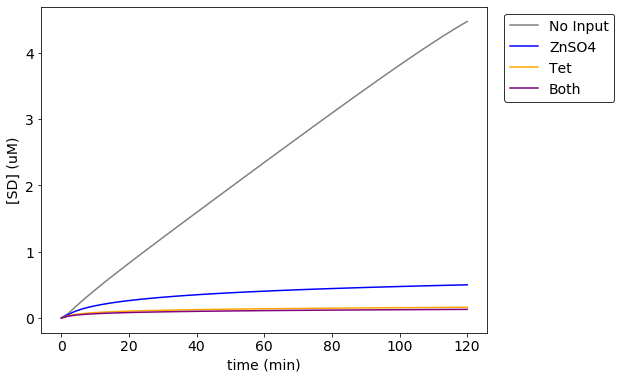

In [7]:
font = {'family' : 'sans serif',
            'weight' : 'normal',
            'size'   : 14}

plt.rc('font', **font)

fig, ax = plt.subplots(1, figsize=(8, 6))
ax.plot(t, ninput, color="grey", label="No Input")
ax.plot(t, ZnSO4, color="blue", label ="ZnSO4")
ax.plot(t, Tet, color="orange", label ="Tet")
ax.plot(t, Both, color="purple", label ="Both")
plt.xlabel("time (min)")
plt.ylabel("[SD] (uM)")
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', ncol=1, edgecolor = 'black')
plt.savefig('NOR', bbox_inches="tight")

### Saving the result to a csv file:

In [8]:
rows = zip(ninput,ZnSO4,Tet,Both)
with open('NOR.csv', "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)
        

df = pd.read_csv('NOR.csv', header=None)
df.rename(columns={0: 'No Input', 1: 'ZnSO4', 2: 'Tet', 3: 'Both'}, inplace=True)
df.to_csv('NOR.csv', index=False)